## Dataset Name: Chronic Kidney Disease

**Abstract:** This dataset can be used to predict chronic kidney disease and it has been collected at a hospital for a period of nearly 2 months.<br>

**Data Set Characteristics:**  	Multivariate<br>
**Number of Instances:**	400	<br>
**Attribute Characteristics:**	Real<br>
**Number of Attributes:**	25	<br>
**Associated Tasks:**	Classification	


## Problem Statement

a)	Identify the factors causing chronic kidney disease.<br>
b)	Build a model that can help to determine if a patient is suffering from kidney chronic disease or not. 


<a id="lib"></a>
# 1. Import Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

import math

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

from tqdm import tqdm

In [2]:
# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

# Data Preparation

## Read the Data

#### Read the dataset and print the first five observations.

In [3]:
# load the csv file
# store the data in 'df_ckd'
df_ckd = pd.read_csv('kidneyChronic.csv', sep=',')

# display first five observations using head()
df_ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


**Check the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
df_ckd.shape

(400, 25)

**Interpretation:** The data has 400 observations and 25 variables.

## Renaming the Columns

In [5]:
col_dict = {}
columns = ["age - age",
"bp - blood pressure",
"sg - specific gravity",
"al - albumin",
"su - sugar",
"rbc - red blood cells",
"pc - pus cell",
"pcc - pus cell clumps",
"ba - bacteria",
"bgr - blood glucose random",
"bu - blood urea",
"sc - serum creatinine",
"sod - sodium",
"pot - potassium",
"hemo - hemoglobin",
"pcv - packed cell volume",
"wc - white blood cell count",
"rc - red blood cell count",
"htn - hypertension",
"dm - diabetes mellitus",
"cad - coronary artery disease",
"appet - appetite",
"pe - pedal edema",
"ane - anemia",
"class - target"]

for col in columns:
    prev = col.split('-')[0].strip()
    new = col.split('-')[1].strip()
    col_dict[prev] = new
    
col_dict

{'age': 'age',
 'bp': 'blood pressure',
 'sg': 'specific gravity',
 'al': 'albumin',
 'su': 'sugar',
 'rbc': 'red blood cells',
 'pc': 'pus cell',
 'pcc': 'pus cell clumps',
 'ba': 'bacteria',
 'bgr': 'blood glucose random',
 'bu': 'blood urea',
 'sc': 'serum creatinine',
 'sod': 'sodium',
 'pot': 'potassium',
 'hemo': 'hemoglobin',
 'pcv': 'packed cell volume',
 'wc': 'white blood cell count',
 'rc': 'red blood cell count',
 'htn': 'hypertension',
 'dm': 'diabetes mellitus',
 'cad': 'coronary artery disease',
 'appet': 'appetite',
 'pe': 'pedal edema',
 'ane': 'anemia',
 'class': 'target'}

In [6]:
pd.Series(col_dict)

age                          age
bp                blood pressure
sg              specific gravity
al                       albumin
su                         sugar
rbc              red blood cells
pc                      pus cell
pcc              pus cell clumps
ba                      bacteria
bgr         blood glucose random
bu                    blood urea
sc              serum creatinine
sod                       sodium
pot                    potassium
hemo                  hemoglobin
pcv           packed cell volume
wc        white blood cell count
rc          red blood cell count
htn                 hypertension
dm             diabetes mellitus
cad      coronary artery disease
appet                   appetite
pe                   pedal edema
ane                       anemia
class                     target
dtype: object

In [7]:
df_ckd = df_ckd.rename(columns=col_dict)
df_ckd.head(3)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,wbcc,rbcc,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,target
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd


## Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [8]:
# use 'dtypes' to check the data type of a variable
df_ckd.dtypes

age                        object
blood pressure             object
specific gravity           object
albumin                    object
sugar                      object
red blood cells            object
pus cell                   object
pus cell clumps            object
bacteria                   object
blood glucose random       object
blood urea                 object
serum creatinine           object
sodium                     object
potassium                  object
hemoglobin                 object
packed cell volume         object
wbcc                       object
rbcc                       object
hypertension               object
diabetes mellitus          object
coronary artery disease    object
appetite                   object
pedal edema                object
anemia                     object
target                     object
dtype: object

In [9]:
df_ckd.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume', 'wbcc', 'rbcc',
       'hypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'pedal edema', 'anemia', 'target'],
      dtype='object')

#### Change the data type as per the data definition.

In [10]:
# convert object variables to numerical
# use astype() to change the data type

cols = ['age', 'blood pressure', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'wbcc', 'rbcc']

for col in cols:
    df_ckd[col] = pd.to_numeric(df_ckd[col], errors='coerce')
    
    
df_ckd.replace('?', np.nan, inplace=True)

#### Recheck the data type after the conversion. 

In [11]:
# recheck the data types using 'dtypes'
df_ckd.dtypes

age                        float64
blood pressure             float64
specific gravity            object
albumin                     object
sugar                       object
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
wbcc                       float64
rbcc                       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
target                      object
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

In [12]:
df_ckd.head(5)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,wbcc,rbcc,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,target
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Remove Insignificant Variables

In [13]:
df_ckd.std()

age                       17.169714
blood pressure            13.683637
blood glucose random      79.281714
blood urea                50.503006
serum creatinine           5.741126
sodium                    10.408752
potassium                  3.193904
hemoglobin                 2.912587
packed cell volume         8.990105
wbcc                    2944.474190
rbcc                       1.025323
dtype: float64

No column has standard deviation as zero. Thus we are good to go

**Distribution of numeric independent variables**

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df_ckd.select_dtypes(include=numerics)

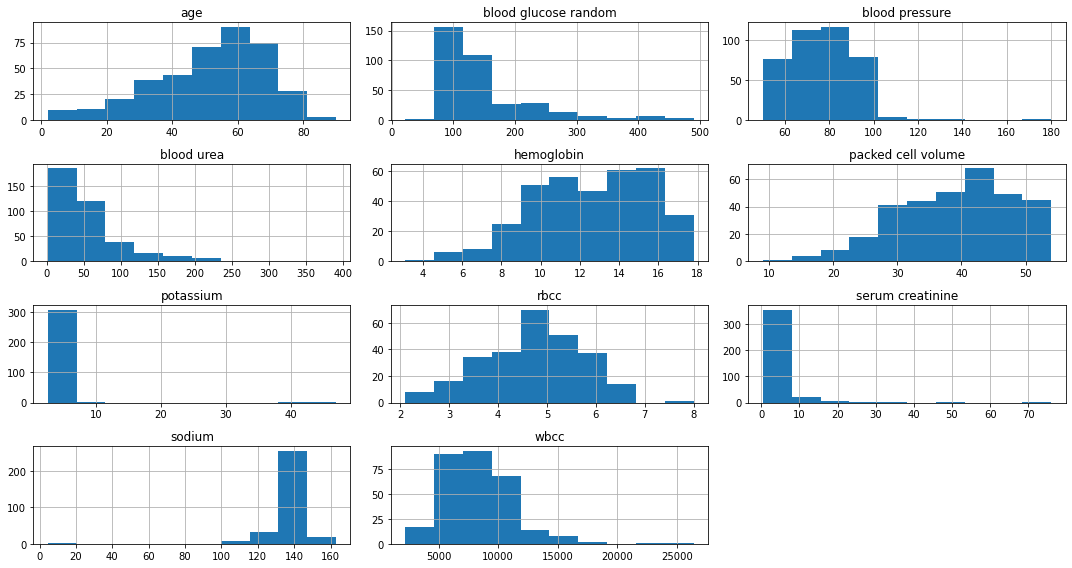

In [15]:
# plot the histogram of numeric variables
# drop the target variable
# axis=1 drops the specified column
num_df.hist()
plt.tight_layout()
plt.show()  

In [16]:
df_ckd.skew()

age                     -0.668259
blood pressure           1.605429
specific gravity        -0.172444
albumin                  0.998157
sugar                    2.464262
blood glucose random     2.010773
blood urea               2.634374
serum creatinine         7.509538
sodium                  -6.996569
potassium               11.582956
hemoglobin              -0.335095
packed cell volume      -0.433679
wbcc                     1.621589
rbcc                    -0.183329
dtype: float64

From the previous distribution chart and the skewness table, we can see that many numerical variables are skewed
    - age looks a bit left skewed but its fine
    - Serum creatinine and potassium are highly right skewed
    - Sodium is highly left skewed
    - Rest of the features are lightly skewed


## Clean the categorical Variables

In [17]:
df_ckd['diabetes mellitus'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetes mellitus, dtype: int64

In [18]:
df_ckd['coronary artery disease'].value_counts()

no      362
yes      34
\tno      2
Name: coronary artery disease, dtype: int64

In [19]:
df_ckd['diabetes mellitus'].replace('\tno', 'no', inplace=True)
df_ckd['diabetes mellitus'].replace('\tyes', 'yes', inplace=True)
df_ckd['diabetes mellitus'].replace(' yes', 'yes', inplace=True)
df_ckd['coronary artery disease'].replace('\tno', 'no', inplace=True)

In [20]:
print(df_ckd['diabetes mellitus'].value_counts())
print(df_ckd['coronary artery disease'].value_counts())

no     261
yes    137
Name: diabetes mellitus, dtype: int64
no     364
yes     34
Name: coronary artery disease, dtype: int64


ckd       62.5
notckd    37.5
Name: target, dtype: float64


<AxesSubplot:xlabel='target', ylabel='count'>

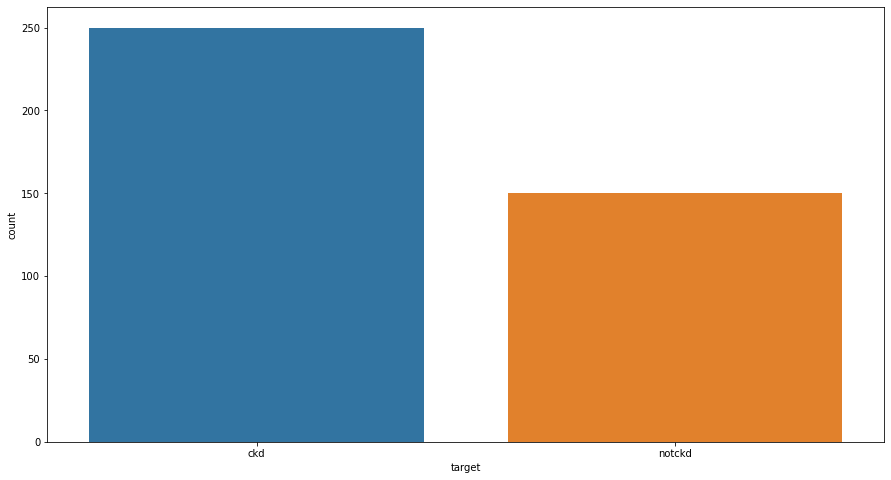

In [21]:
# consider only the target variable
df_target = df_ckd.target.copy()

# get counts of 0's and 1's 
print(df_target.value_counts() / df_ckd.shape[0] *100)


# plot the countplot of the variable
sns.countplot(x = df_target)

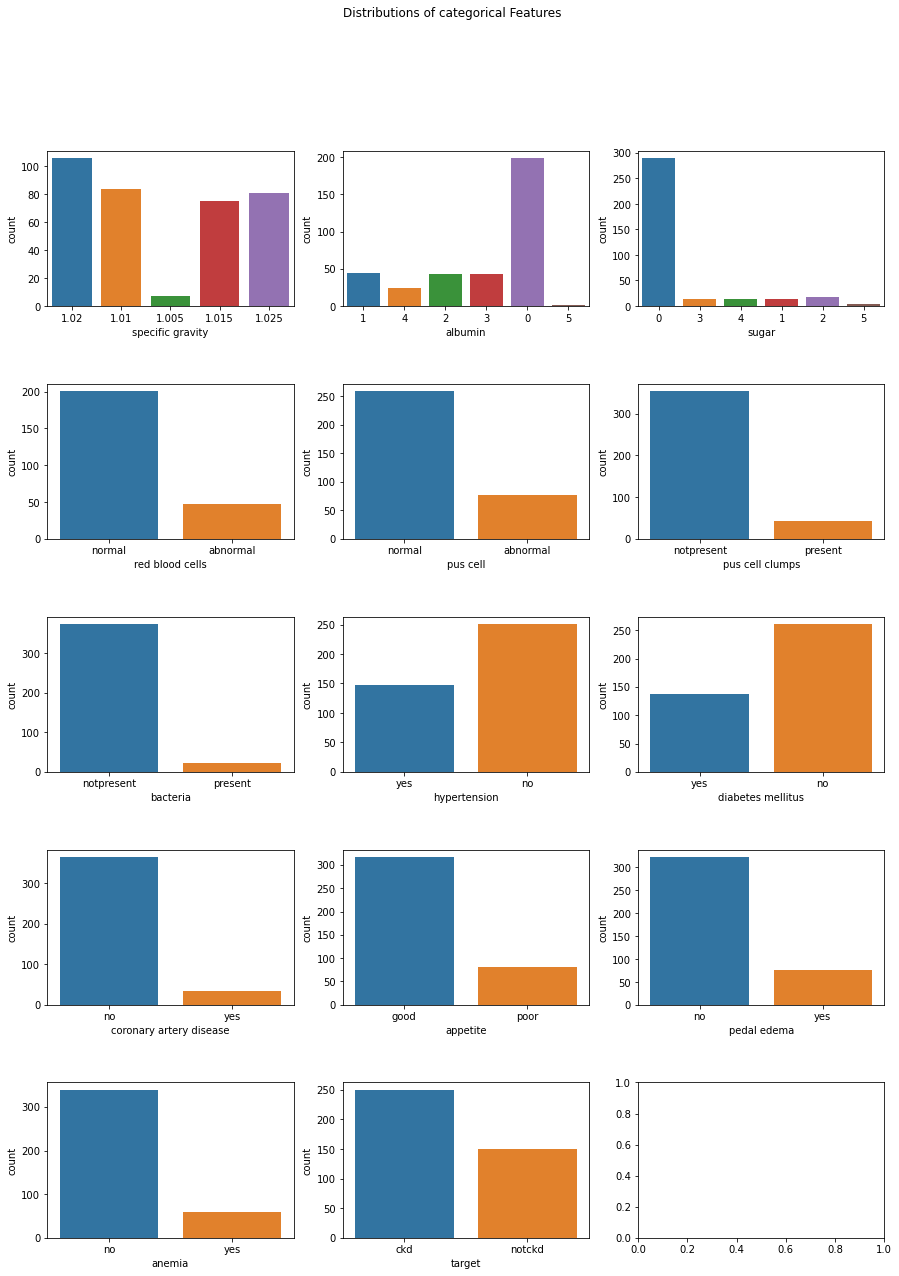

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')

obj_df = df_ckd.select_dtypes(include="object")

for ax, feats in zip(axes.flatten(), obj_df.columns):
    sns.countplot(obj_df[feats], ax=ax)

## Missing Value Treatment

In [23]:
Percentage = []
#index = [i for i in range(0, len(data))]
for val in df_ckd:
    Percentage.append((df_ckd[val].isnull().sum() / df_ckd.shape[0]) * 100)

nulldf = {'Percentage':Percentage, 'DataType': df_ckd.dtypes}
print(pd.DataFrame(nulldf).sort_values(['Percentage'], ascending=False).to_string())

                         Percentage DataType
red blood cells               38.00   object
rbcc                          32.75  float64
wbcc                          26.50  float64
potassium                     22.00  float64
sodium                        21.75  float64
packed cell volume            17.75  float64
pus cell                      16.25   object
hemoglobin                    13.00  float64
sugar                         12.25   object
specific gravity              11.75   object
albumin                       11.50   object
blood glucose random          11.00  float64
blood urea                     4.75  float64
serum creatinine               4.25  float64
blood pressure                 3.00  float64
age                            2.25  float64
bacteria                       1.00   object
pus cell clumps                1.00   object
hypertension                   0.50   object
diabetes mellitus              0.50   object
coronary artery disease        0.50   object
appetite  

In [24]:
def imputenull(data):
    for col in data.columns:
        if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
            data[col].fillna((data[col].median()), inplace=True)
        else:
            data[col].fillna(data[col].value_counts().index[0], inplace=True)
imputenull(df_ckd)

In [25]:
df_ckd.isnull().sum() / df_ckd.shape[0] * 100

age                        0.0
blood pressure             0.0
specific gravity           0.0
albumin                    0.0
sugar                      0.0
red blood cells            0.0
pus cell                   0.0
pus cell clumps            0.0
bacteria                   0.0
blood glucose random       0.0
blood urea                 0.0
serum creatinine           0.0
sodium                     0.0
potassium                  0.0
hemoglobin                 0.0
packed cell volume         0.0
wbcc                       0.0
rbcc                       0.0
hypertension               0.0
diabetes mellitus          0.0
coronary artery disease    0.0
appetite                   0.0
pedal edema                0.0
anemia                     0.0
target                     0.0
dtype: float64

In [26]:
df_ckd.dtypes

age                        float64
blood pressure             float64
specific gravity            object
albumin                     object
sugar                       object
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
wbcc                       float64
rbcc                       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
target                      object
dtype: object

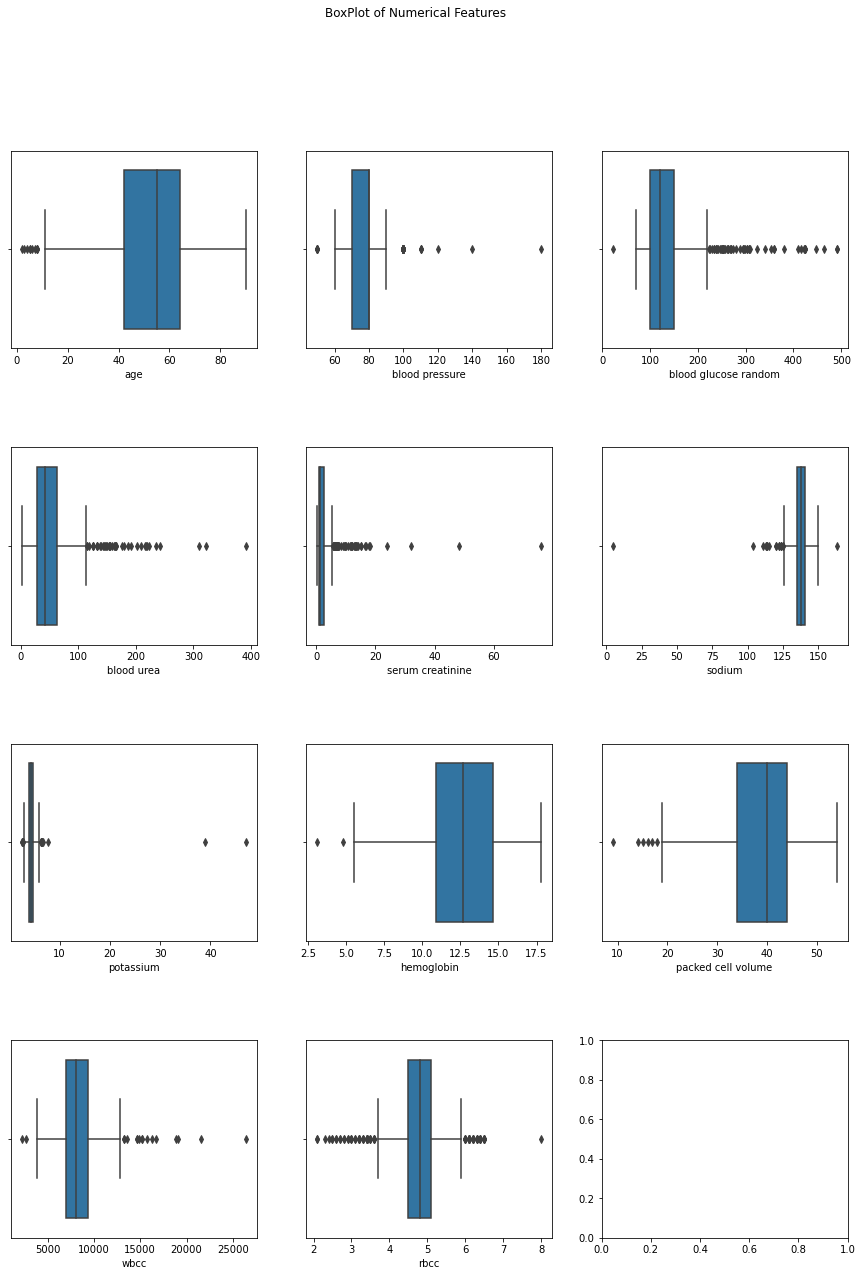

In [27]:
# Function to draw the boxplot

def draw_boxplot(mode=None, col = None):
    if mode == None:
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        num_df = df_ckd.select_dtypes(include=numerics)
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
        fig.subplots_adjust(hspace=0.5)
        fig.suptitle('BoxPlot of Numerical Features')


        for ax, feats in zip(axes.flatten(), num_df.columns):
            sns.boxplot(num_df[feats], ax=ax)
    else:
        sns.boxplot(data = df_ckd, y=col, x="target", hue="target")
        plt.show()
        
draw_boxplot()

## Correlation Matrix

<AxesSubplot:>

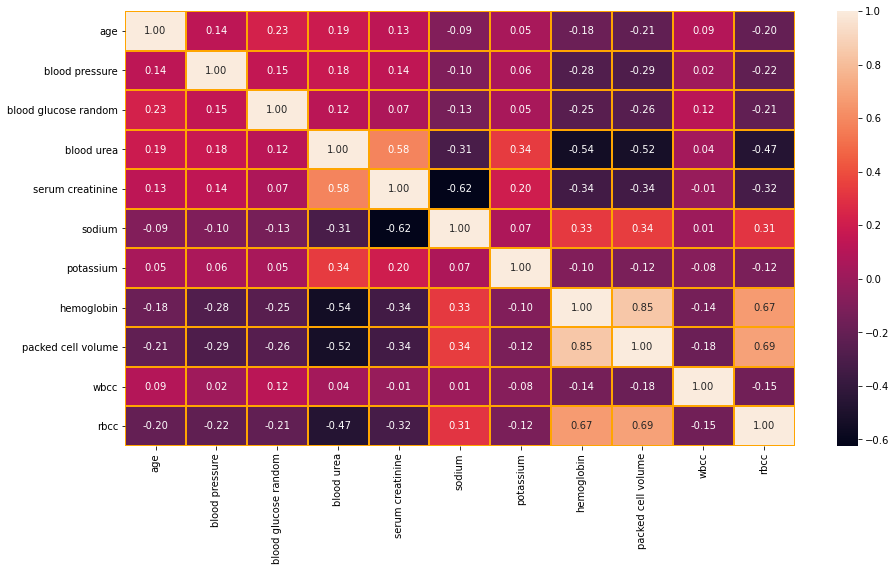

In [28]:
corrmat = df_ckd.corr()

sns.heatmap(corrmat, annot=True, fmt=".2f", linewidths=1, linecolor="orange")

Positive Correlation:
    - Red blood cell count --> Packed cell volume and Hemoglobin

Negative Correlation:
    - Blood urea -->  Red blood cell count, packed cell volume, Hemoglobin
    - Serum creatinine --> Sodium
    - Serum creatinine -->  blood urea


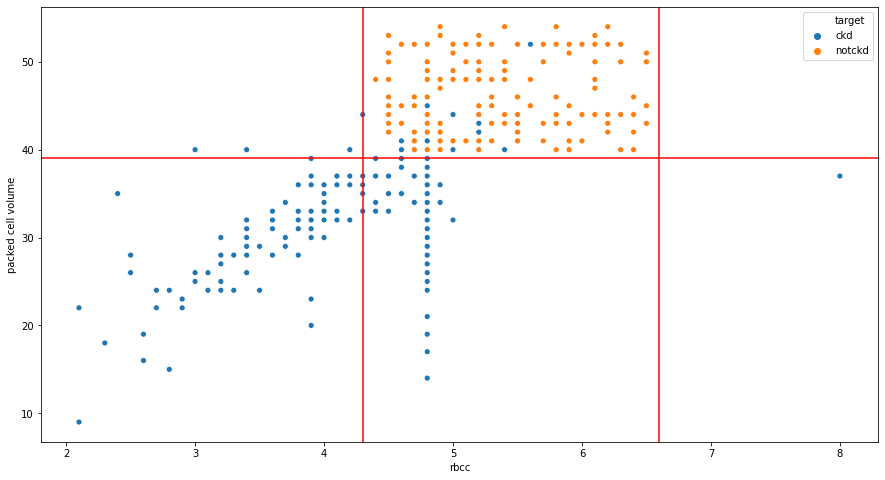

In [29]:
sns.scatterplot(data = df_ckd, x='rbcc', y='packed cell volume', hue="target")
plt.axvline(x = 6.6, color = 'red')
plt.axvline(x = 4.3, color = 'red')
plt.axhline(y = 39, color = 'r', linestyle = '-')
plt.show()

Approx. General Observation:<br>
RBCC range 
    - 2 and < 4.3 and 
Packed Cell Volume range 
    - > 15 and <40 
are mostly classified as having chronic kidney disease


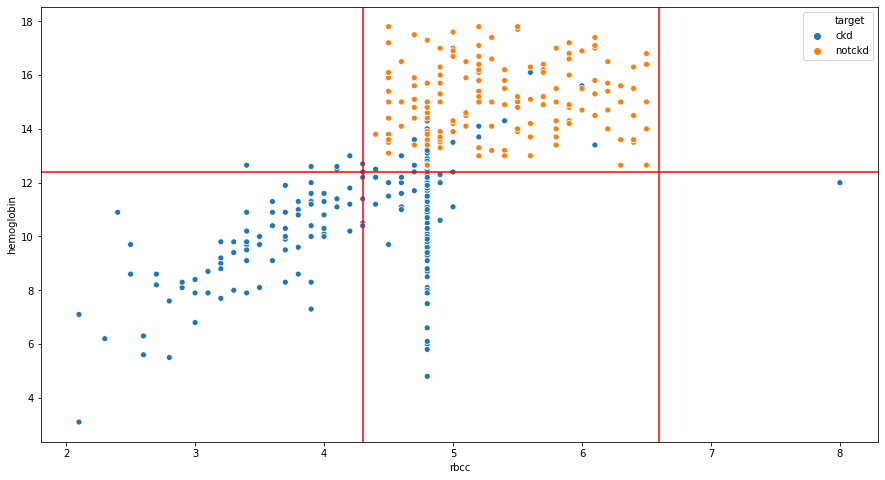

In [30]:
sns.scatterplot(data = df_ckd, x='rbcc', y='hemoglobin', hue="target")
plt.axvline(x = 6.6, color = 'red')
plt.axvline(x = 4.3, color = 'red')
plt.axhline(y = 12.4, color = 'r', linestyle = '-')
plt.show()

Approx. General Observation:<br>
RBCC range 
    - > 4.2 and < 6.6 and 
Hemoglobin range 
    - > 13 
are mostly classified as NOT having chronic kidney disease


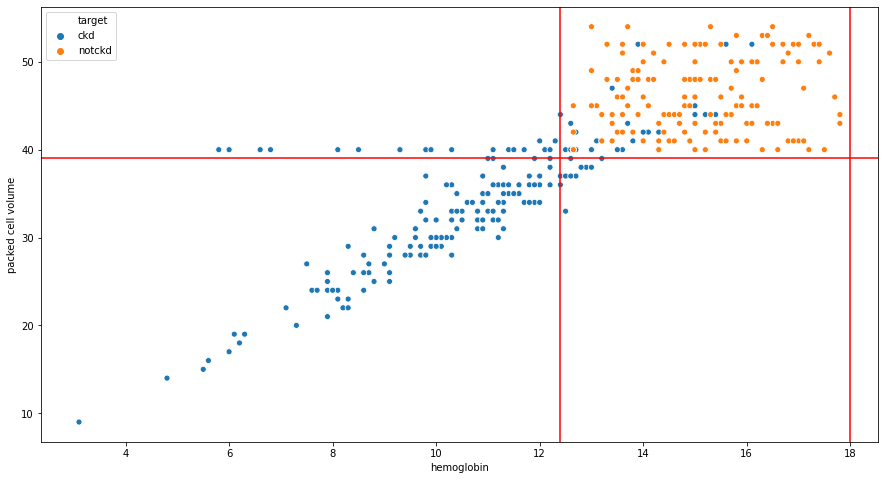

In [31]:
sns.scatterplot(data = df_ckd, y='packed cell volume', x='hemoglobin', hue="target")
plt.axvline(x = 18, color = 'red')
plt.axvline(x = 12.4, color = 'red')
plt.axhline(y = 39, color = 'r', linestyle = '-')
plt.show()

Approx. General Observation:<br>
Hemoglobin range 
    - 12.5 and 
Packed Cell Volume range 
    - > 40 
are mostly classified as NOT having chronic kidney disease


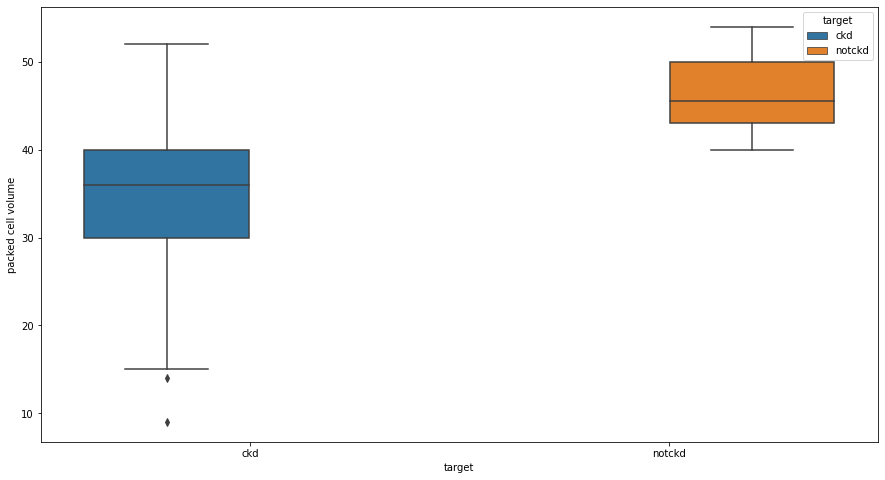

In [32]:
draw_boxplot(mode = "single", col = 'packed cell volume')

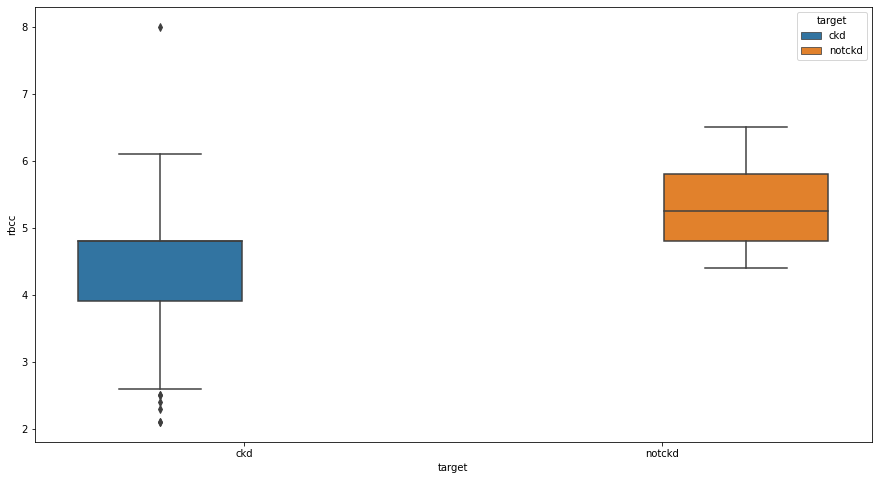

In [33]:
draw_boxplot(mode = "single", col = 'rbcc')

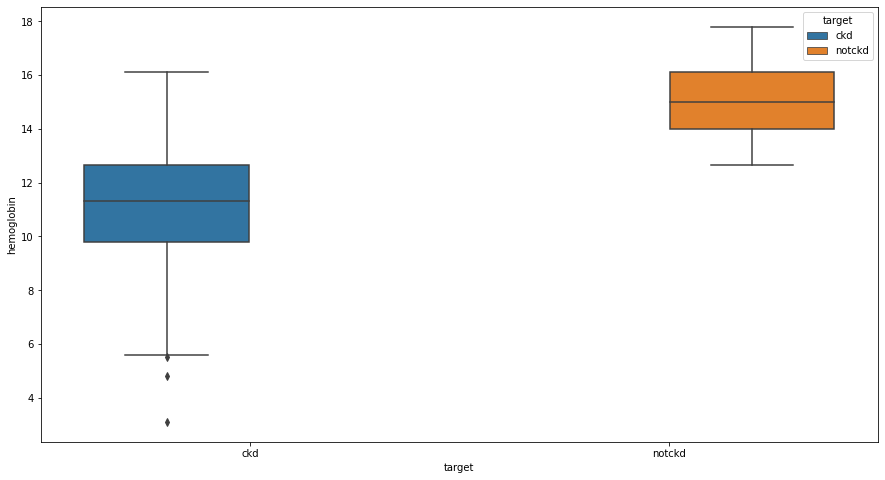

In [34]:
draw_boxplot(mode = "single", col = 'hemoglobin')

<AxesSubplot:xlabel='albumin', ylabel='rbcc'>

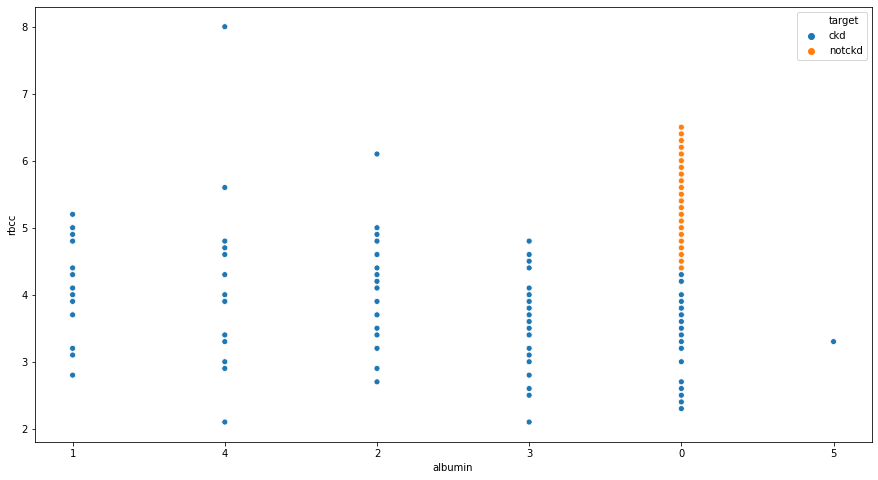

In [35]:
sns.scatterplot(data = df_ckd, x='albumin', y='rbcc', hue="target")

From the chart it is clearly seen that Albumin levels greater than 0 affect CKD highly.

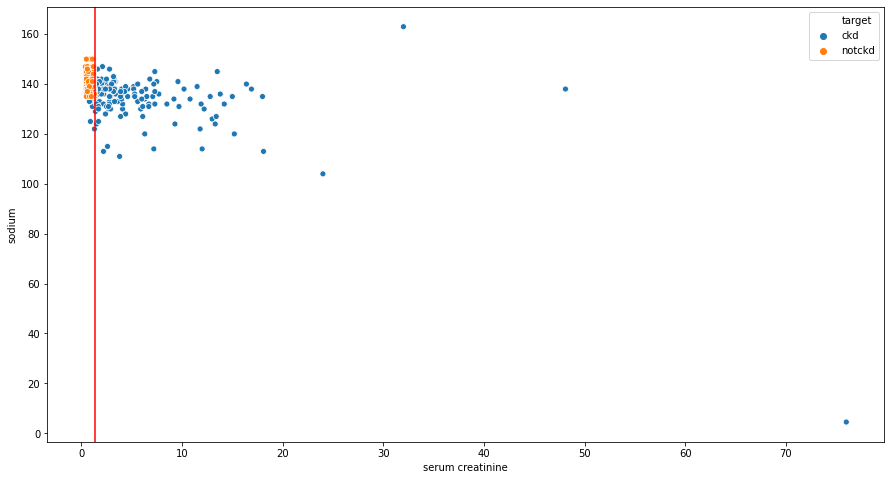

In [36]:
sns.scatterplot(data = df_ckd, x='serum creatinine', y='sodium', hue="target")
plt.axvline(x = 1.4, color = 'red')
plt.show()

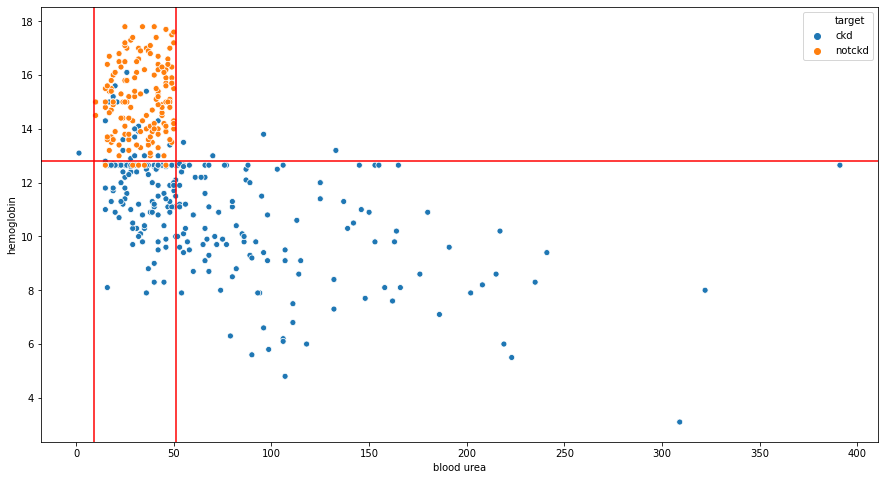

In [37]:
sns.scatterplot(data = df_ckd, x='blood urea', y='hemoglobin', hue="target")
plt.axvline(x = 51, color = 'red')
plt.axvline(x = 9, color = 'red')
plt.axhline(y = 12.8, color = 'r', linestyle = '-')
plt.show()

#### Function to get the lower and the upper bound

In [38]:
def outlinefree(dataCol):    
    sorted(dataCol)
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1   
    LRange = Q1-(1.5 * IQR)   
    URange = Q3+(1.5 * IQR)   
    return LRange, URange

In [39]:
df_ckd.skew(numeric_only=True)

age                     -0.688736
blood pressure           1.601858
blood glucose random     2.204143
blood urea               2.724138
serum creatinine         7.665610
sodium                  -7.929336
potassium               13.132548
hemoglobin              -0.376747
packed cell volume      -0.548541
wbcc                     2.001895
rbcc                    -0.330485
dtype: float64

In [40]:
def treatOutliers(print_ranges = False, treatment = None):
    if print_ranges == True:
        for col in list(num_df.columns):
            Lrange, Urange = outlinefree(df_ckd[col])
            print("{} : \t Lower --> {} || Upper --> {}".format(col, str(Lrange), str(Urange)))
     
    if treatment == None:
        return('None')
        
    elif treatment == 'range':
        for col in list(num_df.columns):
            Lrange, Urange = outlinefree(df_ckd[col])
            df_ckd[col].replace(list(df_ckd[(df_ckd[col] < Lrange)][col]), Lrange, inplace=True)
            df_ckd[col].replace(list(df_ckd[(df_ckd[col] > Urange)][col]), Urange, inplace=True)
            print("Outliers replaced with Lower and Upper Range ...")

        
treatOutliers(print_ranges = True)

age : 	 Lower --> 9.0 || Upper --> 97.0
blood pressure : 	 Lower --> 55.0 || Upper --> 95.0
blood glucose random : 	 Lower --> 27.5 || Upper --> 223.5
blood urea : 	 Lower --> -25.125 || Upper --> 113.875
serum creatinine : 	 Lower --> -1.8375000000000008 || Upper --> 5.462500000000001
sodium : 	 Lower --> 126.0 || Upper --> 150.0
potassium : 	 Lower --> 2.8000000000000003 || Upper --> 6.0
hemoglobin : 	 Lower --> 5.25 || Upper --> 20.25
packed cell volume : 	 Lower --> 19.0 || Upper --> 59.0
wbcc : 	 Lower --> 3337.5 || Upper --> 13037.5
rbcc : 	 Lower --> 3.6000000000000005 || Upper --> 5.999999999999999


'None'

In [41]:
treatOutliers(print_ranges = False, treatment='range')

Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...
Outliers replaced with Lower and Upper Range ...


In [42]:
df_ckd.skew(numeric_only=True)

age                    -0.622206
blood pressure          0.057519
blood glucose random    0.908317
blood urea              0.999847
serum creatinine        1.179435
sodium                 -0.043064
potassium               0.152948
hemoglobin             -0.324248
packed cell volume     -0.408008
wbcc                    0.358188
rbcc                   -0.034722
dtype: float64

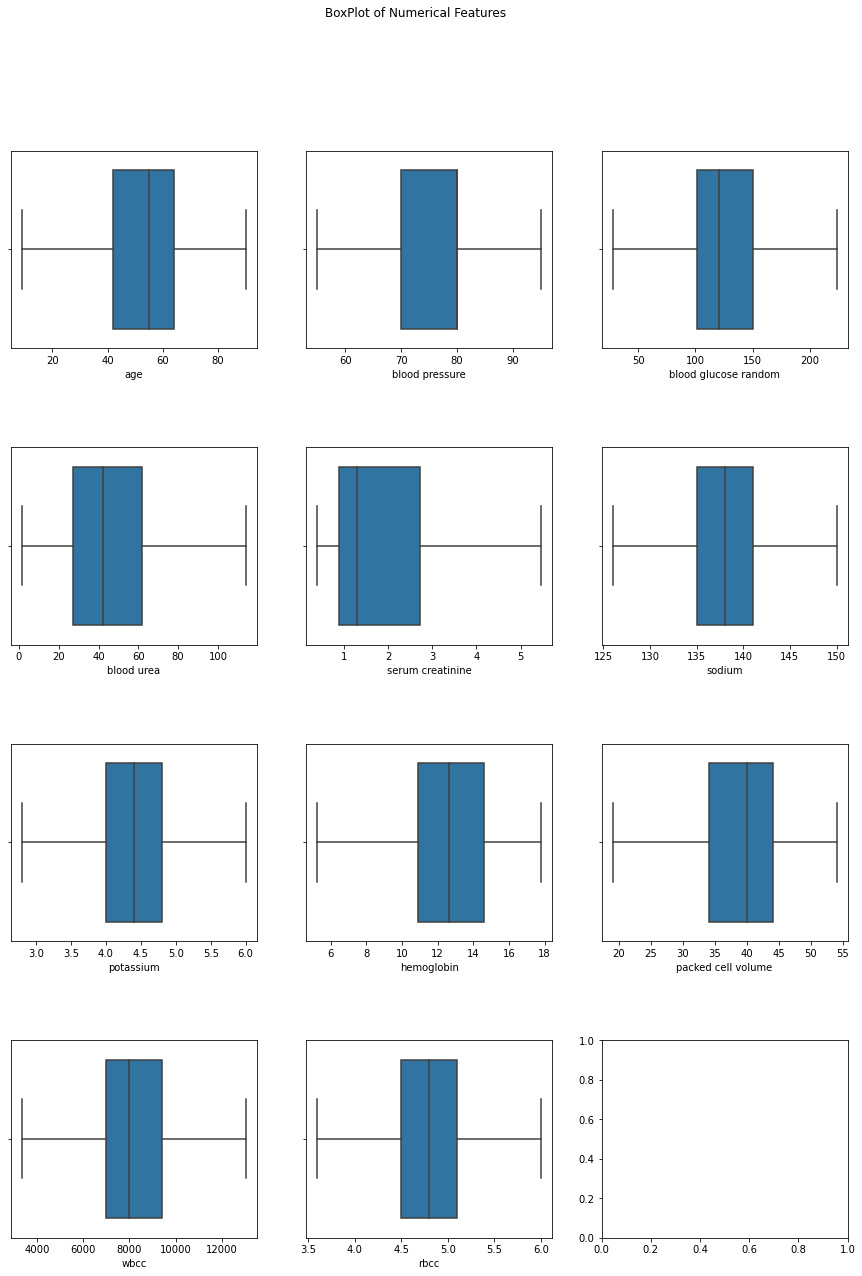

In [43]:
draw_boxplot()

All te outliers are now treated

## Target and Feature Separation

#### Shuffle the dataset

In [44]:
from sklearn.utils import shuffle
df_ckd = shuffle(df_ckd)

#### Separate out the target variabke and the independent variables

In [45]:
df_target = df_ckd['target']

df_feature = df_ckd.drop('target', axis = 1)

#### Separate the categorical variables

In [46]:
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['specific gravity', 'albumin', 'sugar', 'red blood cells', 'pus cell',
       'pus cell clumps', 'bacteria', 'hypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia'],
      dtype='object')

#### Separate the numerical variables

In [47]:
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['age', 'blood pressure', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'hemoglobin',
       'packed cell volume', 'wbcc', 'rbcc'],
      dtype='object')

## Scale the data

In [48]:
df_num = df_num.apply(lambda rec:(rec - rec.mean())/rec.std(), axis = 0)

## Dummy Encoding the Categorical Variables

In [49]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [50]:
X = pd.concat([df_num, dummy_var], axis = 1)

X.head()

,age,blood pressure,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,wbcc,...,red blood cells_normal,pus cell_normal,pus cell clumps_present,bacteria_present,hypertension_yes,diabetes mellitus_yes,coronary artery disease_yes,appetite_poor,pedal edema_yes,anemia_yes
130,-0.098323,1.292003,-0.130417,2.100033,2.079512,-0.799755,0.656792,-1.612717,-2.147942,2.397379,...,1,0,1,1,0,0,0,1,1,1
189,0.737196,-1.442394,1.941507,0.254997,1.366635,-0.230872,1.601251,-1.130645,-1.270975,-0.329486,...,0,0,0,1,1,1,0,1,1,0
73,0.200077,1.747735,-0.108722,1.873015,2.079512,-1.179010,0.027153,-2.706651,-2.523785,-0.920409,...,0,0,0,0,1,0,0,0,1,1
276,-1.888721,-1.442394,-0.282286,-0.273336,-0.473047,-0.230872,0.499383,0.538067,0.232396,-1.806794,...,1,1,0,0,0,0,0,0,0,0
105,0.796876,0.380537,-0.412459,-0.603544,2.079512,0.148384,-0.602486,0.575149,0.357677,-0.674191,...,1,1,0,0,0,0,0,0,0,0


In [51]:
X.columns

Index(['age', 'blood pressure', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'hemoglobin',
       'packed cell volume', 'wbcc', 'rbcc', 'specific gravity_1.01',
       'specific gravity_1.015', 'specific gravity_1.02',
       'specific gravity_1.025', 'albumin_1', 'albumin_2', 'albumin_3',
       'albumin_4', 'albumin_5', 'sugar_1', 'sugar_2', 'sugar_3', 'sugar_4',
       'sugar_5', 'red blood cells_normal', 'pus cell_normal',
       'pus cell clumps_present', 'bacteria_present', 'hypertension_yes',
       'diabetes mellitus_yes', 'coronary artery disease_yes', 'appetite_poor',
       'pedal edema_yes', 'anemia_yes'],
      dtype='object')

## Encode target variable

In [52]:
df_target[0]

'ckd'

In [53]:
df_target = pd.Series([1 if i=='ckd' else 0 for i in df_target])

In [54]:
df_ckd.target.value_counts()

ckd       250
notckd    150
Name: target, dtype: int64

## Train-Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 0, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 35)
y_train (320,)
X_test (80, 35)
y_test (80,)


In [56]:
def report(model, X, Y):
    y_pred = model.predict(X)
    print(classification_report(Y, y_pred))
    print("ROC-AUC-Score: "+ str(roc_auc_score(Y, y_pred)))
    print('\n')

In [57]:
def conf_matrix(model):
    predicted = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predicted) 
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, annot_kws = {'size': 15},
                xticklabels = ['Predicted: Healthy','Predicted: Has CKD'], 
                yticklabels = ['Actual: Healthy','Actual: Has CKD'], square=True)
    plt.ylabel("True label") 
    plt.xlabel("Predicted label") 
    plt.show()

In [58]:
def plot_roc(model, name):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    label = '{} Model (AUC Score = {})'.format(name, round(auc_score, 4))
    plt.plot(fpr, tpr, label=label)
    return fpr, tpr, thresholds

# Logistic Regression

In [59]:
def logistic_funct():
    logistic_classification = LogisticRegression(random_state=0)
    logistic = logistic_classification.fit(X_train, y_train)
    
    print("--> Train Report: ")
    report(logistic, X_train, y_train)
    
    print("--> Test Report: ")
    report(logistic, X_test, y_test)
    
    return logistic

In [60]:
log_model = logistic_funct()

--> Train Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

ROC-AUC-Score: 0.9958333333333333


--> Test Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

ROC-AUC-Score: 0.9833333333333334




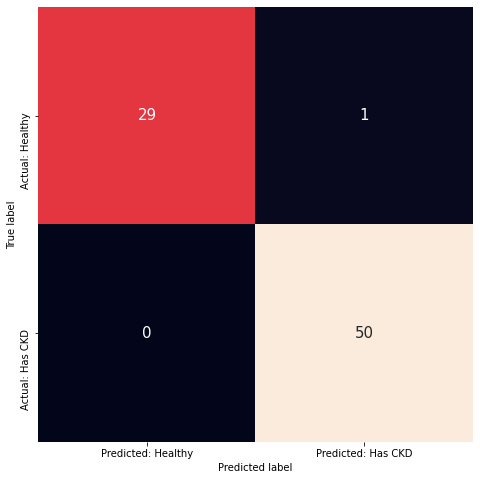

In [61]:
conf_matrix(log_model)

# Decision Tree

In [62]:
def dtree_funct():
    decision_tree_classification = DecisionTreeClassifier(criterion='entropy', random_state=0)
    decision_tree = decision_tree_classification.fit(X_train, y_train)
    
    print("--> Train Report: ")
    report(decision_tree, X_train, y_train)
    
    print("--> Test Report: ")
    report(decision_tree, X_test, y_test)
    
    return decision_tree

In [63]:
dtree = dtree_funct()

--> Train Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

ROC-AUC-Score: 1.0


--> Test Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.98      0.94      0.96        50

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

ROC-AUC-Score: 0.9533333333333334




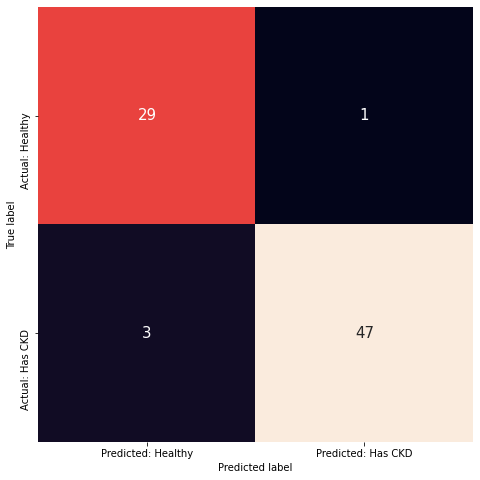

In [64]:
conf_matrix(dtree)

### Plot Decision Tree

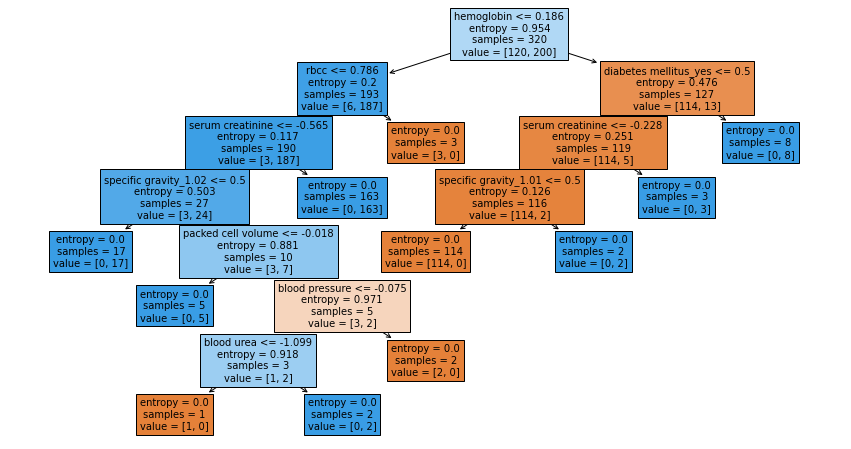

In [65]:
_ = tree.plot_tree(dtree, feature_names=X.columns, filled=True)

# Random Forest

In [66]:
def random_forest_funct():
    random_forest_classification = RandomForestClassifier(random_state=10)
    random_forest = random_forest_classification.fit(X_train, y_train)
    
    print("--> Train Report: ")
    report(random_forest, X_train, y_train)
    
    print("--> Test Report: ")
    report(random_forest, X_test, y_test)
    
    return random_forest

In [67]:
forest = random_forest_funct()

--> Train Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

ROC-AUC-Score: 1.0


--> Test Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

ROC-AUC-Score: 0.99




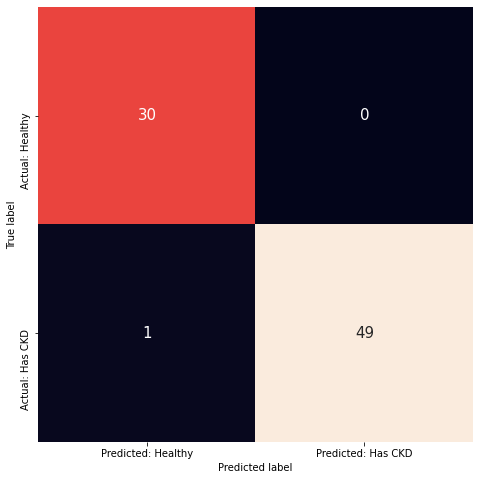

In [68]:
conf_matrix(forest)

<AxesSubplot:xlabel='Imp', ylabel='Features'>

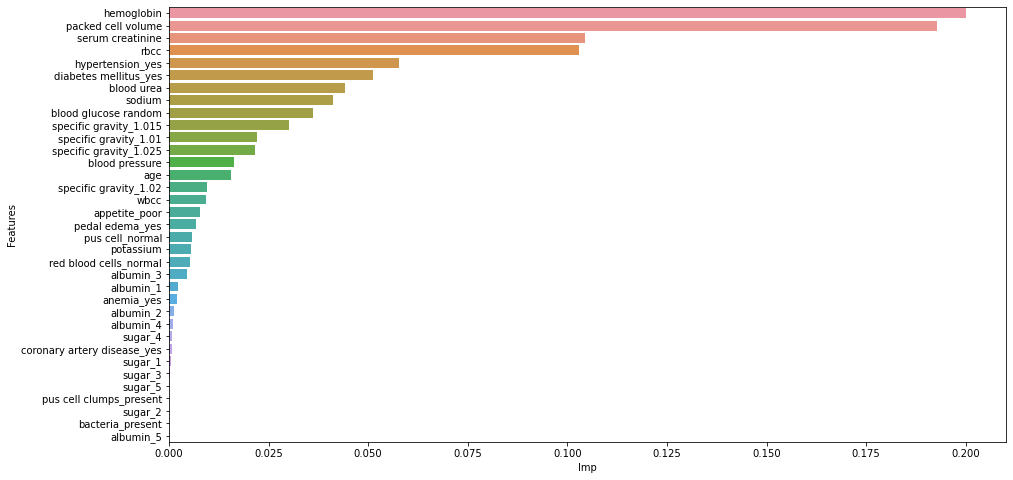

In [69]:
df_importance = pd.DataFrame({"Features":X.columns, "Imp": forest.feature_importances_}).sort_values('Imp', ascending=False)

sns.barplot(y='Features', x='Imp', data = df_importance)

## KNN

In [70]:
def knn_model_funct(k=5, metric='minkowski'):
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    
    print("--> Train Report: ")
    report(knn, X_train, y_train)
    
    print("--> Test Report: ")
    report(knn, X_test, y_test)
    
    return knn

In [71]:
knn_model = knn_model_funct()

--> Train Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       120
           1       1.00      0.95      0.98       200

    accuracy                           0.97       320
   macro avg       0.97      0.98      0.97       320
weighted avg       0.97      0.97      0.97       320

ROC-AUC-Score: 0.9775


--> Test Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.92      0.96        50

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

ROC-AUC-Score: 0.96




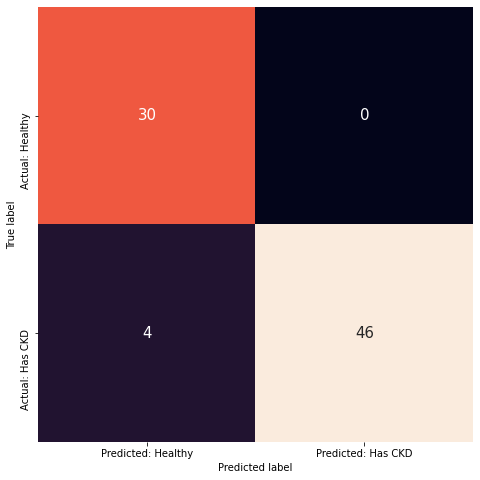

In [72]:
conf_matrix(knn_model)

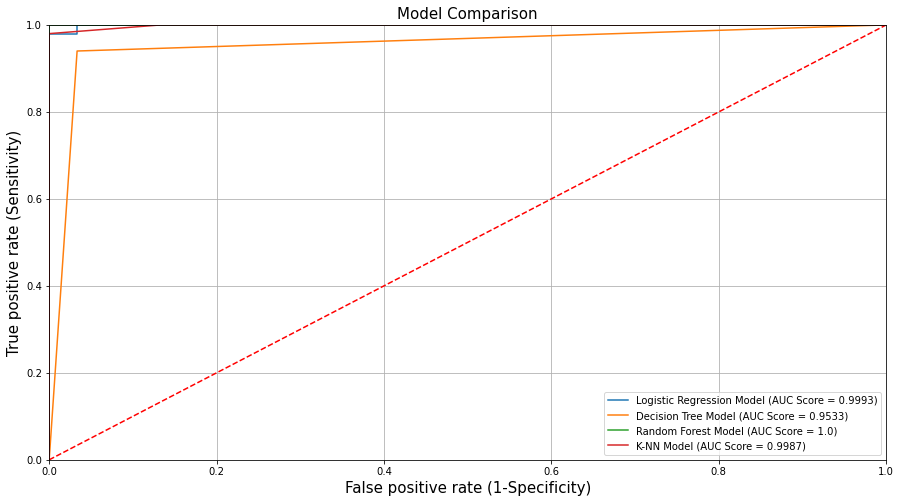

In [73]:
# Logistic Regression
plot_roc(log_model, 'Logistic Regression')

# Decision Tree
plot_roc(dtree, 'Decision Tree')

# Random Forest
plot_roc(forest, 'Random Forest')

# K Nearest Neighbors
plot_roc(knn_model, 'K-NN')

# set limits for x and y axes
plt.xlim([0.0, 1.])
plt.ylim([0.0, 1.])
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Model Comparison', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# set the position of legend
plt.legend(loc = 'lower right')

# plot the grid
plt.grid(True)